In [1]:
import csv
import os
import pandas as pd
import numpy as np
import holidays
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Get the directory of the current script
script_dir = os.getcwd()

# Navigate through the folder structure to access the dataset
data_dir = os.path.abspath(os.path.join(script_dir, '..', 'data', 'processed', 'Facebook'))

# Construct the path to the dataset
dataset_path = os.path.join(data_dir, "Facebook_MD_Piedmont.csv")

# Read the dataset
data = pd.read_csv(dataset_path)
data

,Unnamed: 0,ds,country,polygon_source,polygon_id,polygon_name,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,0,2020-03-01,ITA,GADM,ITA.13_1,Piemonte,-0.13483,0.21336,full_february,DAY_OF_WEEK
1,1,2020-03-02,ITA,GADM,ITA.13_1,Piemonte,-0.12708,0.16110,full_february,DAY_OF_WEEK
2,2,2020-03-03,ITA,GADM,ITA.13_1,Piemonte,-0.05433,0.12924,full_february,DAY_OF_WEEK
3,3,2020-03-04,ITA,GADM,ITA.13_1,Piemonte,-0.05700,0.12595,full_february,DAY_OF_WEEK
4,4,2020-03-05,ITA,GADM,ITA.13_1,Piemonte,-0.10948,0.14849,full_february,DAY_OF_WEEK
...,...,...,...,...,...,...,...,...,...,...
486,486,2021-06-30,ITA,GADM,ITA.13_1,Piemonte,-0.01564,0.11567,full_february,DAY_OF_WEEK
487,487,2021-07-01,ITA,GADM,ITA.13_1,Piemonte,0.00494,0.11334,full_february,DAY_OF_WEEK
488,488,2021-07-02,ITA,GADM,ITA.13_1,Piemonte,-0.01546,0.11247,full_february,DAY_OF_WEEK
489,489,2021-07-03,ITA,GADM,ITA.13_1,Piemonte,-0.01511,0.13419,full_february,DAY_OF_WEEK


In [5]:
data.drop(['Unnamed: 0', 'country', 'polygon_source', 'polygon_name', 'polygon_id'], axis=1, inplace=True)
data.rename(columns = {'ds': 'date'}, inplace=True)
data['date'] = pd.to_datetime(data['date'], dayfirst=False, format= '%Y-%m-%d')
data.iloc[0:, 1] = data.iloc[0:, 1]*100
data.iloc[0:, 2] = data.iloc[0:, 2]*100
data.drop(data.tail(4).index,inplace=True)
data

,date,all_day_bing_tiles_visited_relative_change,all_day_ratio_single_tile_users,baseline_name,baseline_type
0,2020-03-01,-13.483,21.336,full_february,DAY_OF_WEEK
1,2020-03-02,-12.708,16.110,full_february,DAY_OF_WEEK
2,2020-03-03,-5.433,12.924,full_february,DAY_OF_WEEK
3,2020-03-04,-5.700,12.595,full_february,DAY_OF_WEEK
4,2020-03-05,-10.948,14.849,full_february,DAY_OF_WEEK
...,...,...,...,...,...
482,2021-06-26,-0.281,12.827,full_february,DAY_OF_WEEK
483,2021-06-27,-2.880,17.681,full_february,DAY_OF_WEEK
484,2021-06-28,-0.111,11.906,full_february,DAY_OF_WEEK
485,2021-06-29,-1.856,11.891,full_february,DAY_OF_WEEK


In [8]:
data.isnull().sum()

date                                          0
all_day_bing_tiles_visited_relative_change    0
all_day_ratio_single_tile_users               0
baseline_name                                 0
baseline_type                                 0
dtype: int64

In [9]:
data.dtypes

date                                          datetime64[ns]
all_day_bing_tiles_visited_relative_change           float64
all_day_ratio_single_tile_users                      float64
baseline_name                                         object
baseline_type                                         object
dtype: object

In [10]:
# Data is missing only for some dates

In [11]:
data['all_day_bing_tiles_visited_relative_change_rolling'] = data.all_day_bing_tiles_visited_relative_change.rolling(7).mean()#.shift(-3)
data['all_day_ratio_single_tile_users_rolling'] = data.all_day_ratio_single_tile_users.rolling(7).mean()

# **7-day rolling averages**

C:\Users\mrnkl\AppData\Local\Temp\ipykernel_16372\2247129986.py:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',


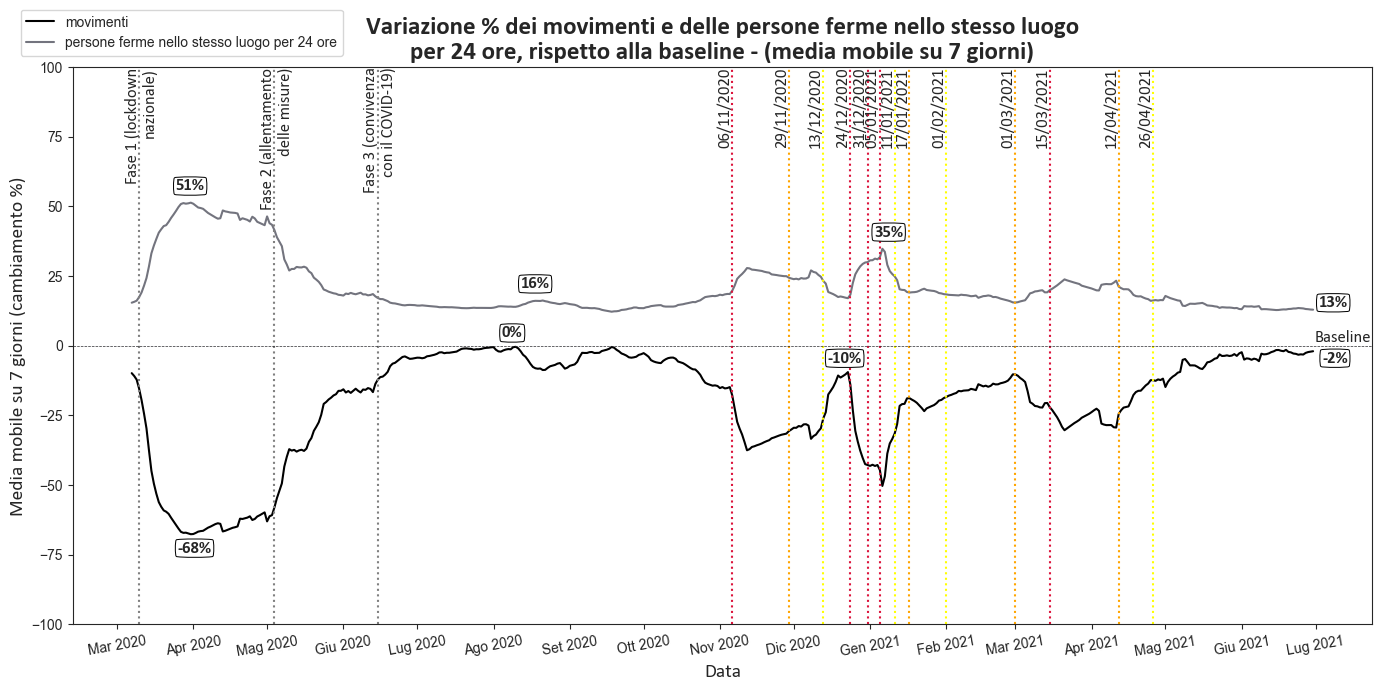

In [12]:
cfont = {'fontname':'Calibri'}

#sns.set_context("talk")
#sns.set(rc={"figure.figsize":(18, 7)})
sns.set_style('ticks')

fig, ax = plt.subplots(figsize = (14,7)) 

# Time series plot with Seaborn lineplot()
sns.lineplot(ax=ax, x="date", y='all_day_bing_tiles_visited_relative_change_rolling', label= 'movimenti', data=data, color='black') #blue
sns.lineplot(ax=ax, x="date", y='all_day_ratio_single_tile_users_rolling', label= 'persone ferme nello stesso luogo per 24 ore', data=data, color='#73747e') #darkgreen

# axis labels
ax.set_title("Variazione % dei movimenti e delle persone ferme nello stesso luogo\nper 24 ore, rispetto alla baseline - (media mobile su 7 giorni)", size=18, weight= 'bold', **cfont)
ax.set_xlabel("Data", size=14, **cfont)
ax.set_ylabel("Media mobile su 7 giorni (cambiamento %)", size=14, **cfont)

phases = [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')]
for x in phases:
    ax.axvline(x=x, color='gray', linestyle=':')
    
red_zones = [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'), pd.to_datetime('2021-01-05'), pd.to_datetime('2021-03-15')]
for x in red_zones:
    ax.axvline(x=x, color='crimson', linestyle=':')
    
orange_zones = [pd.to_datetime('2020-11-29'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-03-01'), pd.to_datetime('2021-04-12')]
for x in orange_zones:
    ax.axvline(x=x, color='orange', linestyle=':')
    
yellow_zones = [pd.to_datetime('2020-12-13'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-04-26')]
for x in yellow_zones:
    ax.axvline(x=x, color='yellow', linestyle=':')
    
annot1 = pd.DataFrame({'x': [pd.to_datetime('2020-03-10'), pd.to_datetime('2020-05-04'), pd.to_datetime('2020-06-15')], 
                            'y': [57, 48, 54]}, 
                           index=['Fase 1 (lockdown\nnazionale)', 'Fase 2 (allentamento\ndelle misure)', 'Fase 3 (convivenza\ncon il COVID-19)'])
for t, p in annot1.iterrows():
    ax.annotate(text=t, xy=p, xytext=(13, 4), textcoords='offset points', rotation=90, fontsize=12, ha= 'right', **cfont)
    
annot2 = pd.DataFrame({'x': [pd.to_datetime('2020-11-06'), pd.to_datetime('2020-11-29'), pd.to_datetime('2020-12-13'), pd.to_datetime('2020-12-24'), pd.to_datetime('2020-12-31'),
                                  pd.to_datetime('2021-01-05'), pd.to_datetime('2021-01-11'), pd.to_datetime('2021-01-17'), pd.to_datetime('2021-02-01'), pd.to_datetime('2021-03-01'),
                                  pd.to_datetime('2021-03-15'), pd.to_datetime('2021-04-12'), pd.to_datetime('2021-04-26')], 
                            'y': [70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70]}, 
                           index=['06/11/2020', '29/11/2020', '13/12/2020', '24/12/2020', '31/12/2020', '05/01/2021', '11/01/2021',
                                  '17/01/2021', '01/02/2021', '01/03/2021', '15/03/2021', '12/04/2021', '26/04/2021'])
for t, p in annot2.iterrows():
    ax.annotate(text=t, xy=p, xytext=(-11, 4), textcoords='offset points', rotation=90, fontsize=12, **cfont)

import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
#plt.gcf().autofmt_xdate() # Rotation

ax.axhline(y=0, color='#28282c', linestyle='--', linewidth=0.5)
ax.annotate(text='Baseline', xy=(pd.to_datetime('2021-07-01'), 0), xytext=(-1, 3), textcoords='offset points', rotation=0, fontsize=12, **cfont)

bbox_props = dict(boxstyle="round4, pad=0.15", fc="w", ec="k", lw=0.72)
#arrowprops=dict(arrowstyle="-|>", facecolor='black', connectionstyle="arc3")
kw = dict(xycoords='data', textcoords="offset points", fontsize=12, fontweight='bold', bbox=bbox_props, ha="right", va="top") #arrowprops=arrowprops

ax.annotate('{:,d}%'.format(np.round(data['all_day_bing_tiles_visited_relative_change_rolling'].min()).astype(int)), 
            xy=(data[data['all_day_bing_tiles_visited_relative_change_rolling'] == data['all_day_bing_tiles_visited_relative_change_rolling'].min()].date.iloc[0],
                data['all_day_bing_tiles_visited_relative_change_rolling'].min()),
            xytext=(15, -5), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 8].all_day_bing_tiles_visited_relative_change_rolling.max()).astype(int)), 
            xy=(data[data['all_day_bing_tiles_visited_relative_change_rolling'] == data[data.date.dt.month == 8].all_day_bing_tiles_visited_relative_change_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 8].all_day_bing_tiles_visited_relative_change_rolling.max()),
            xytext=(5, 15), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 12].all_day_bing_tiles_visited_relative_change_rolling.max()).astype(int)), 
            xy=(data[data['all_day_bing_tiles_visited_relative_change_rolling'] == data[data.date.dt.month == 12].all_day_bing_tiles_visited_relative_change_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 12].all_day_bing_tiles_visited_relative_change_rolling.max()),
            xytext=(10, 15), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-06-30'].all_day_bing_tiles_visited_relative_change_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), data[data['date'] == '2021-06-30'].all_day_bing_tiles_visited_relative_change_rolling.iloc[0]),
            xytext=(25, 0), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data['all_day_ratio_single_tile_users_rolling'].max()).astype(int)), 
            xy=(data[data['all_day_ratio_single_tile_users_rolling'] == data['all_day_ratio_single_tile_users_rolling'].max()].date.iloc[0],
                data['all_day_ratio_single_tile_users_rolling'].max()),
            xytext=(10, 17), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 8].all_day_ratio_single_tile_users_rolling.max()).astype(int)), 
            xy=(data[data['all_day_ratio_single_tile_users_rolling'] == data[data.date.dt.month == 8].all_day_ratio_single_tile_users_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 8].all_day_ratio_single_tile_users_rolling.max()),
            xytext=(5, 17), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data.date.dt.month == 1].all_day_ratio_single_tile_users_rolling.max()).astype(int)), 
            xy=(data[data['all_day_ratio_single_tile_users_rolling'] == data[data.date.dt.month == 1].all_day_ratio_single_tile_users_rolling.max()].date.iloc[0],
                data[data.date.dt.month == 1].all_day_ratio_single_tile_users_rolling.max()),
            xytext=(15, 17), **cfont, **kw)

ax.annotate('{:,d}%'.format(np.round(data[data['date'] == '2021-06-30'].all_day_ratio_single_tile_users_rolling.iloc[0]).astype(int)), 
            xy=(pd.to_datetime('2021-06-30'), data[data['date'] == '2021-06-30'].all_day_ratio_single_tile_users_rolling.iloc[0]),
            xytext=(25, 10), **cfont, **kw)

ax.set_ylim(-100, 100)
ax.set_xticklabels(['Mar 2020', 'Apr 2020', 'Mag 2020', 'Giu 2020', 'Lug 2020', 'Ago 2020', 'Set 2020', 'Ott 2020', 'Nov 2020', 'Dic 2020',
                  'Gen 2021', 'Feb 2021', 'Mar 2021', 'Apr 2021', 'Mag 2021', 'Giu 2021', 'Lug 2021'])
plt.xticks(rotation=10)
plt.legend(loc=(-0.04,1.02))
fig.tight_layout()

# Change major ticks to show every 20.
#ax.xaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
#ax.xaxis.set_minor_locator(AutoMinorLocator(4))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
#ax.grid(which='major', color='#CCCCCC', linestyle='--')
#ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.show()